### 1. DT (Decision Tree, 의사결정나무) 🌳
데이터를 여러 기준에 따라 분기하면서 나무 구조로 분류하는 알고리즘. 말 그대로 순서도처럼 작동.

In [1]:
#라이브러리 불러오기

import pandas as pd  # 데이터 분석을 위한 라이브러리
import numpy as np  # 수학 연산을 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.tree import DecisionTreeClassifier  # 의사결정나무 분류기
from sklearn.metrics import accuracy_score  # 정확도 평가 함수
from sklearn import tree  # 의사결정나무 시각화 라이브러리
import matplotlib.pyplot as plt  # 그래프 시각화를 위한 라이브러리

In [ ]:
# 1. CSV 파일에서 데이터 불러오기
file_path = r"../iris.csv"  # 파일 경로 (r'': 문자열로 인식)
df = pd.read_csv(file_path)  # CSV 파일 읽기
df  # 읽은 파일 출력

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# 2️. X(features), y(target) 분리 / train, test 분리(8:2 비율)
X = df.iloc[:, :-1]  # 마지막 열(Name)을 제외한 나머지 열 (SepalLength, SepalWidth, PetalLength, PetalWidth) = x값
y = df.iloc[:, -1]  # 마지막 열(Name) = y값

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율
y_test  # 4개 데이터 중 X_train 출력

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Name, dtype: object

In [4]:
# 3. 의사결정나무(DT) 모델 생성, 학습(= 훈련)
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)  # DT 모델 생성 ('랜덤 시드 고정'이라는데 무슨 뜻이지?)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소

dt_model.fit(X_train, y_train)  # 학습 데이터로 훈련

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [8]:
# 4. 학습된 모델로 예측 수행, 예측 정확도 평가
y_pred = dt_model.predict(X_test)  # 테스트 데이터 예측

print(y_pred)

accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f"DT 모델 정확도: {accuracy:.2f}")  # 정확도 출력


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
DT 모델 정확도: 1.00


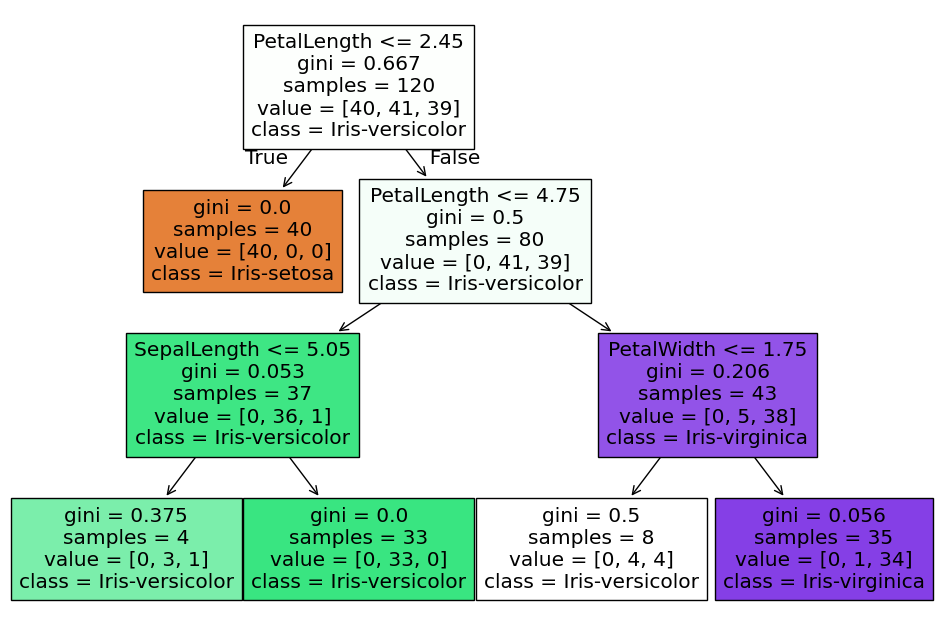

In [28]:
# 5. 의사결정나무 시각화 (선택 사항)
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.show()

In [29]:
# 외전. 교차 검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"교차 검증 평균 정확도: {scores.mean():.2f}")

교차 검증 평균 정확도: 0.96
